In [19]:
!pip install statsmodels
!pip install brewer2mpl
!pip install matplotlib
!pip install seaborn

In [5]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('classic')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.9.3
0.13.2


In [6]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### 1. Scatter plot

Scatteplot is a classic and fundamental plot used to study the relationship between two variables. If you have multiple groups in your data you may want to visualise each group in a different color. In matplotlib, you can conveniently do this using plt.scatterplot()

In [7]:
# Import dataset 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")


['AAR' 'AAU' 'AHR' 'ALR' 'ALU' 'HAR' 'HAU' 'HHR' 'HLR' 'HLU' 'LAR' 'LAU'
 'LHR' 'LHU']


C:\Users\qather\AppData\Local\Temp\ipykernel_3160\2868572990.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter('area', 'poptotal',


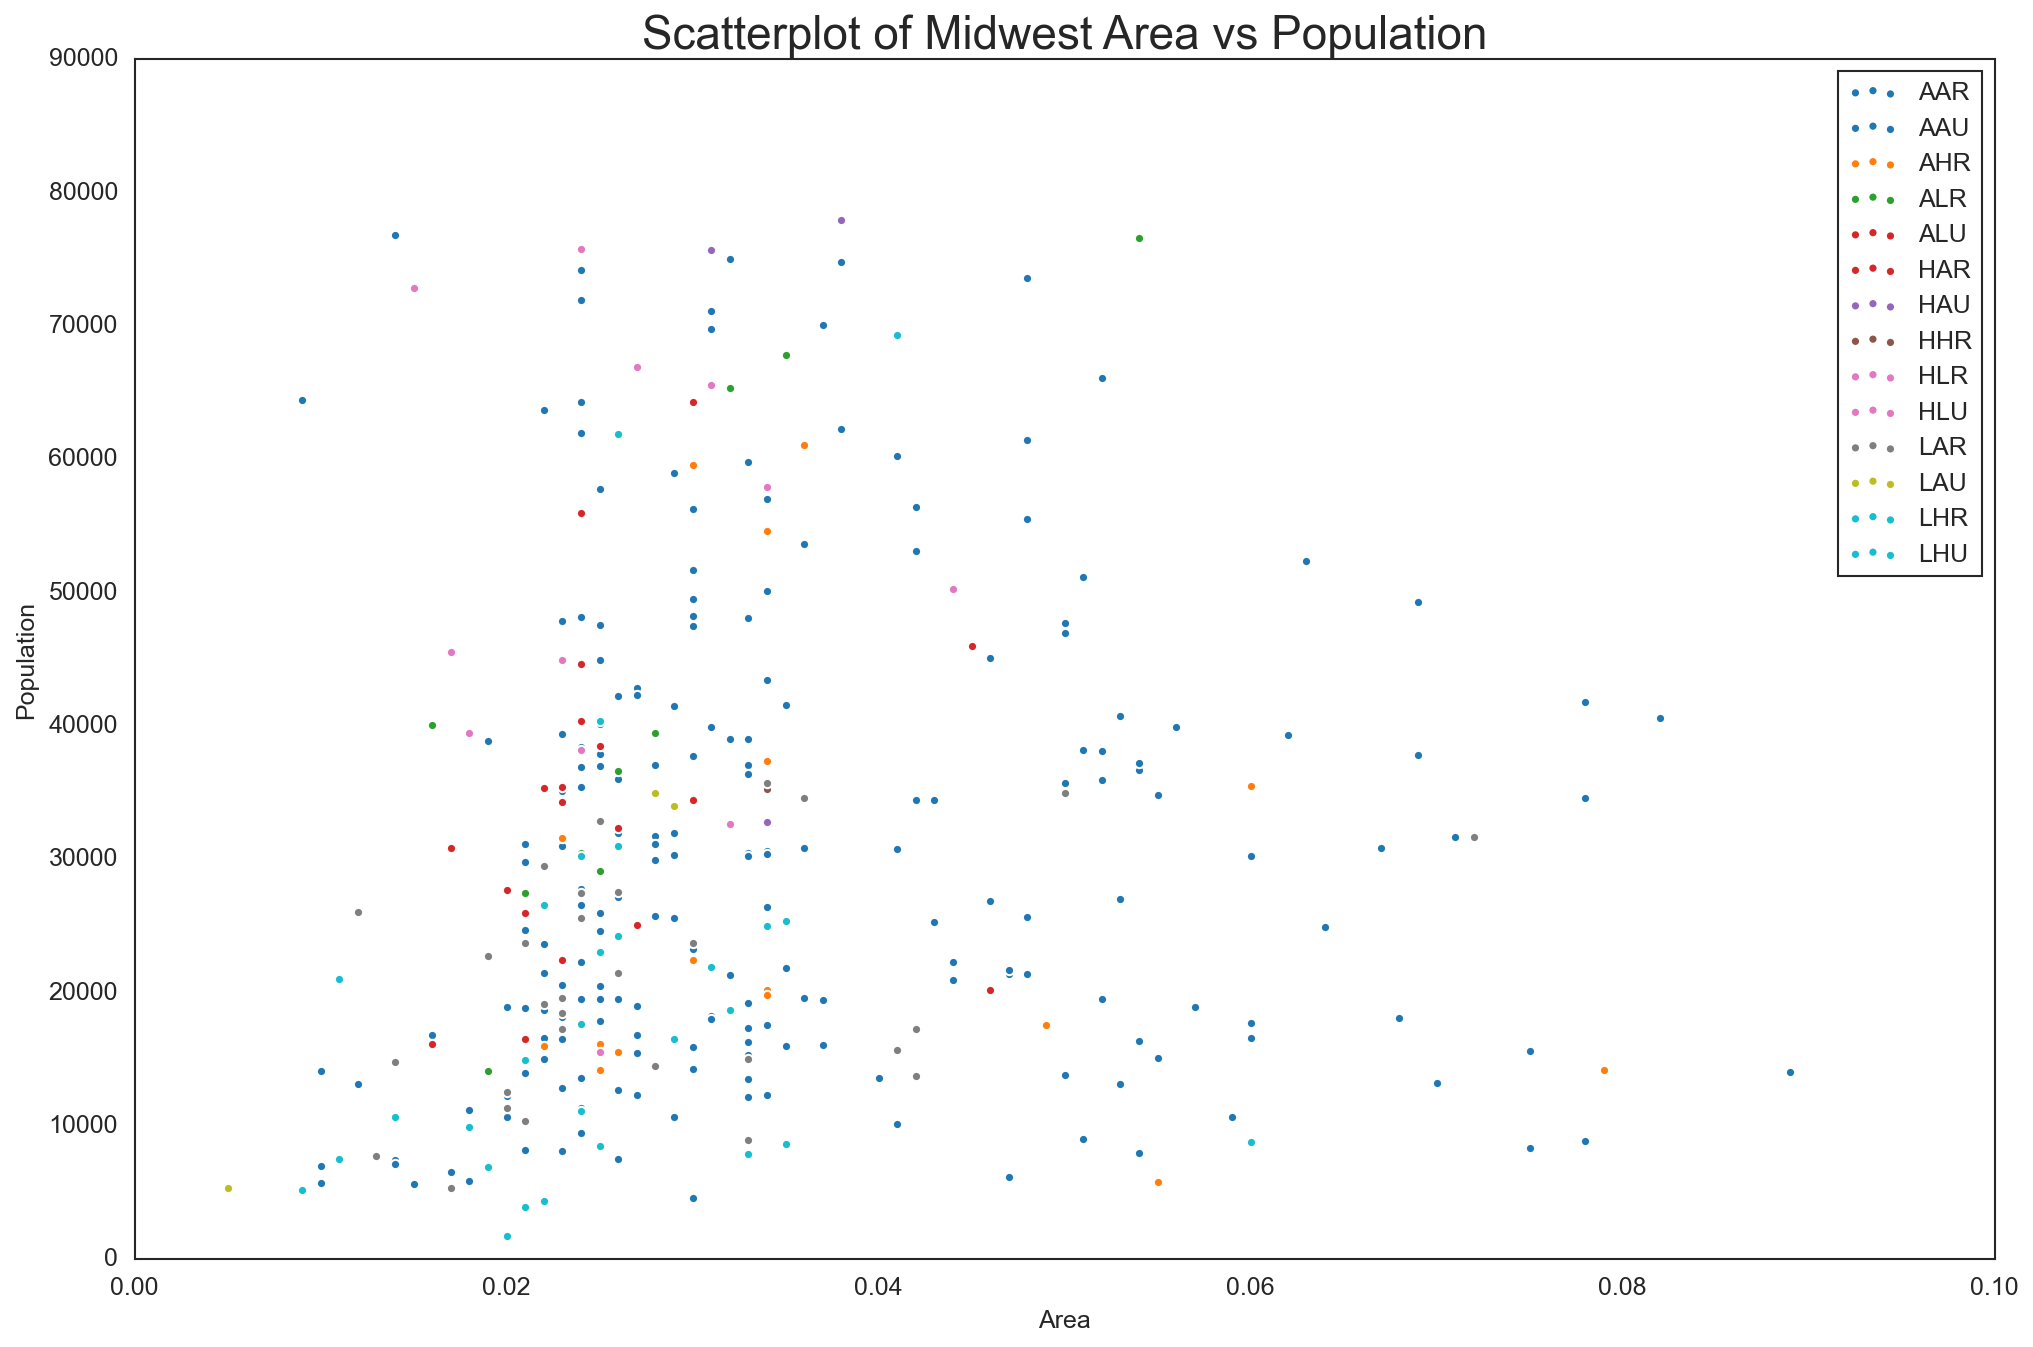

In [8]:
# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
print(categories)
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 150, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

### 2. Bubble plot with Encircling
Sometimes you want to show a group of points within a boundary to emphasize their importance. In this example, you get the records from the dataframe that should be encircled and pass it to the encircle() described in the code below.

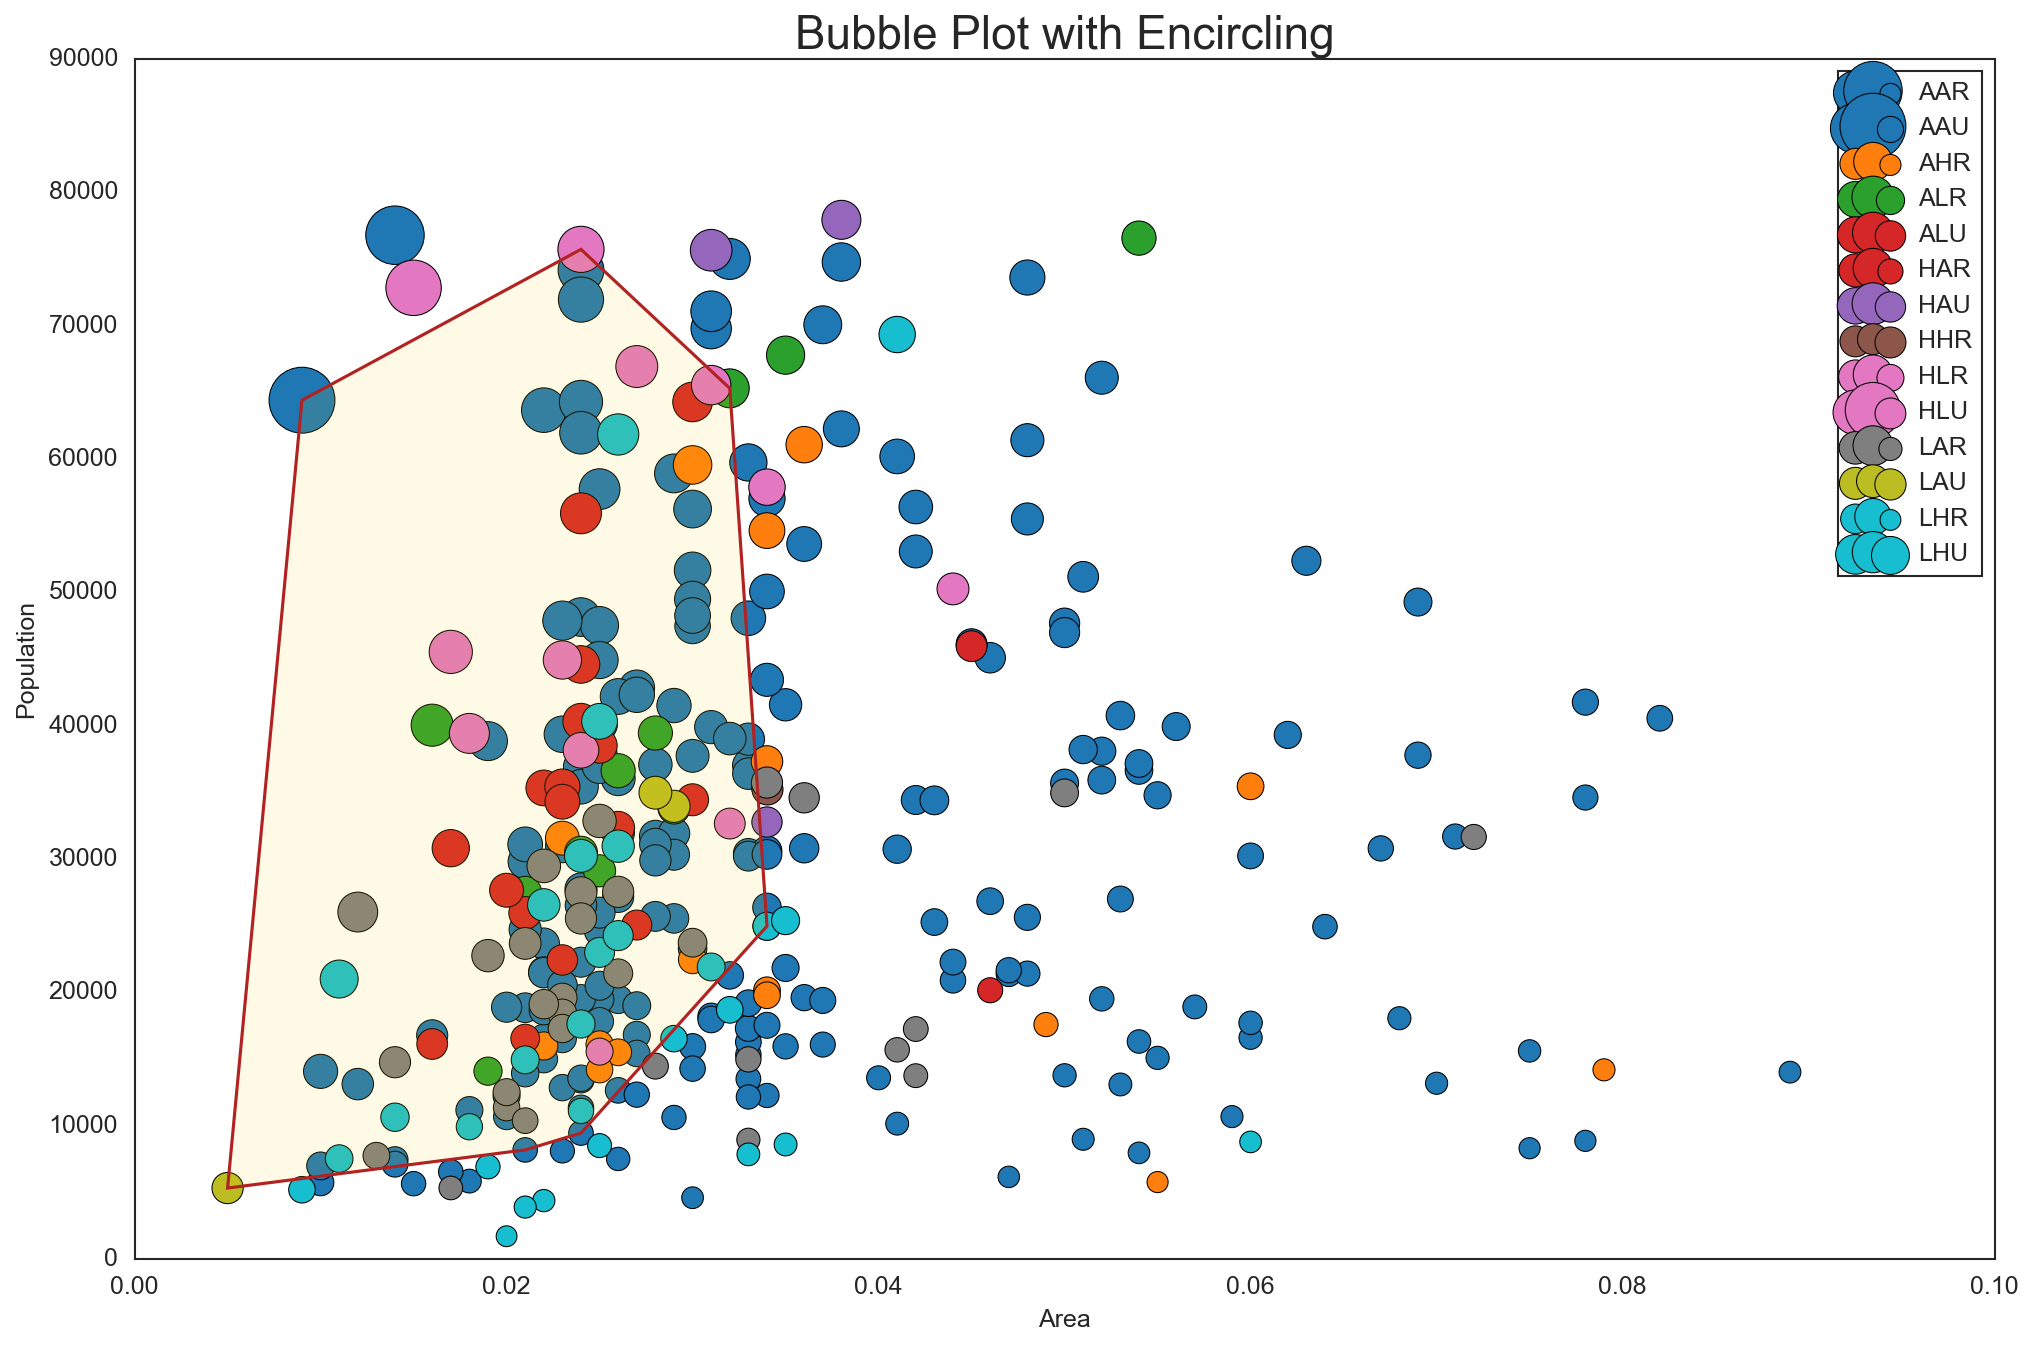

In [9]:


from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 150, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    



### 3. Scatter plot with linear regression line of best fit
If you want to understand how two variables change with respect to each other, the line of best fit is the way to go. The below plot shows how the line of best fit differs amongst various groups in the data. To disable the groupings and to just draw one line-of-best-fit for the entire dataset, remove the hue='cyl' parameter from the sns.lmplot() call below.

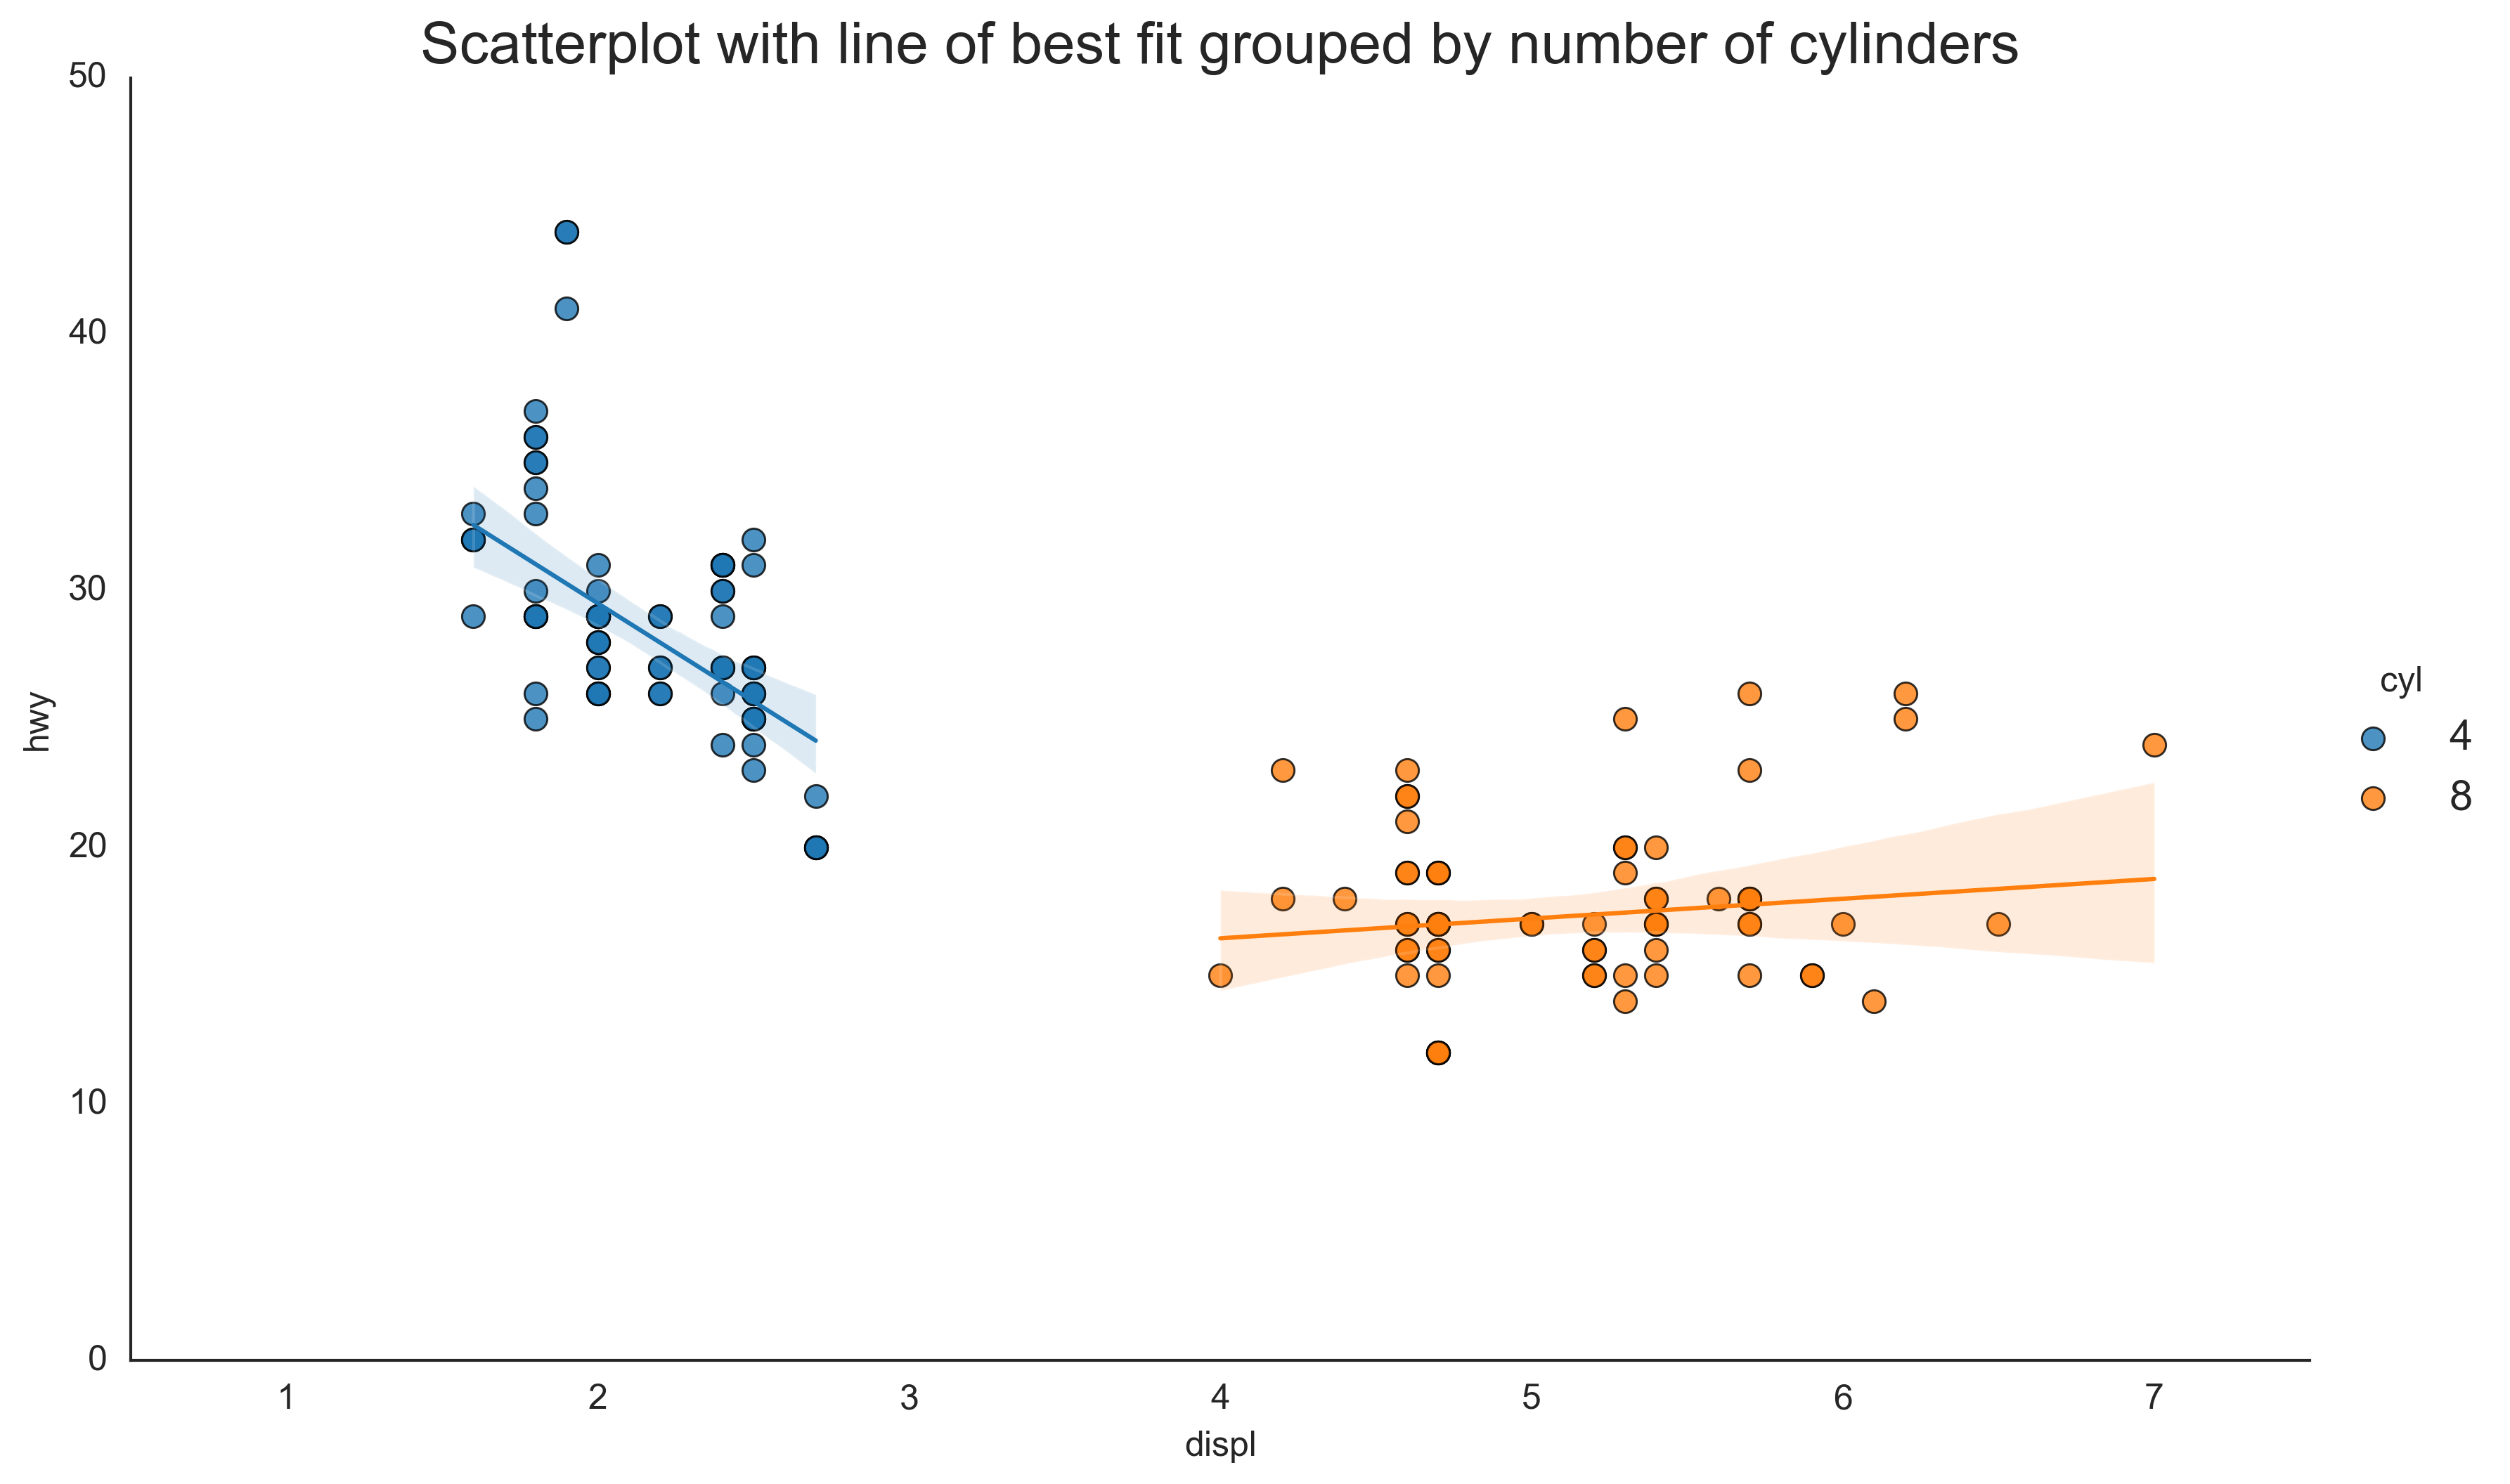

In [10]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
plt.gcf().set_dpi(300)
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()


### Each regression line in its own column
Alternately, you can show the best fit line for each group in its own column. You cando this by setting the col=groupingcolumn parameter inside the sns.lmplot().

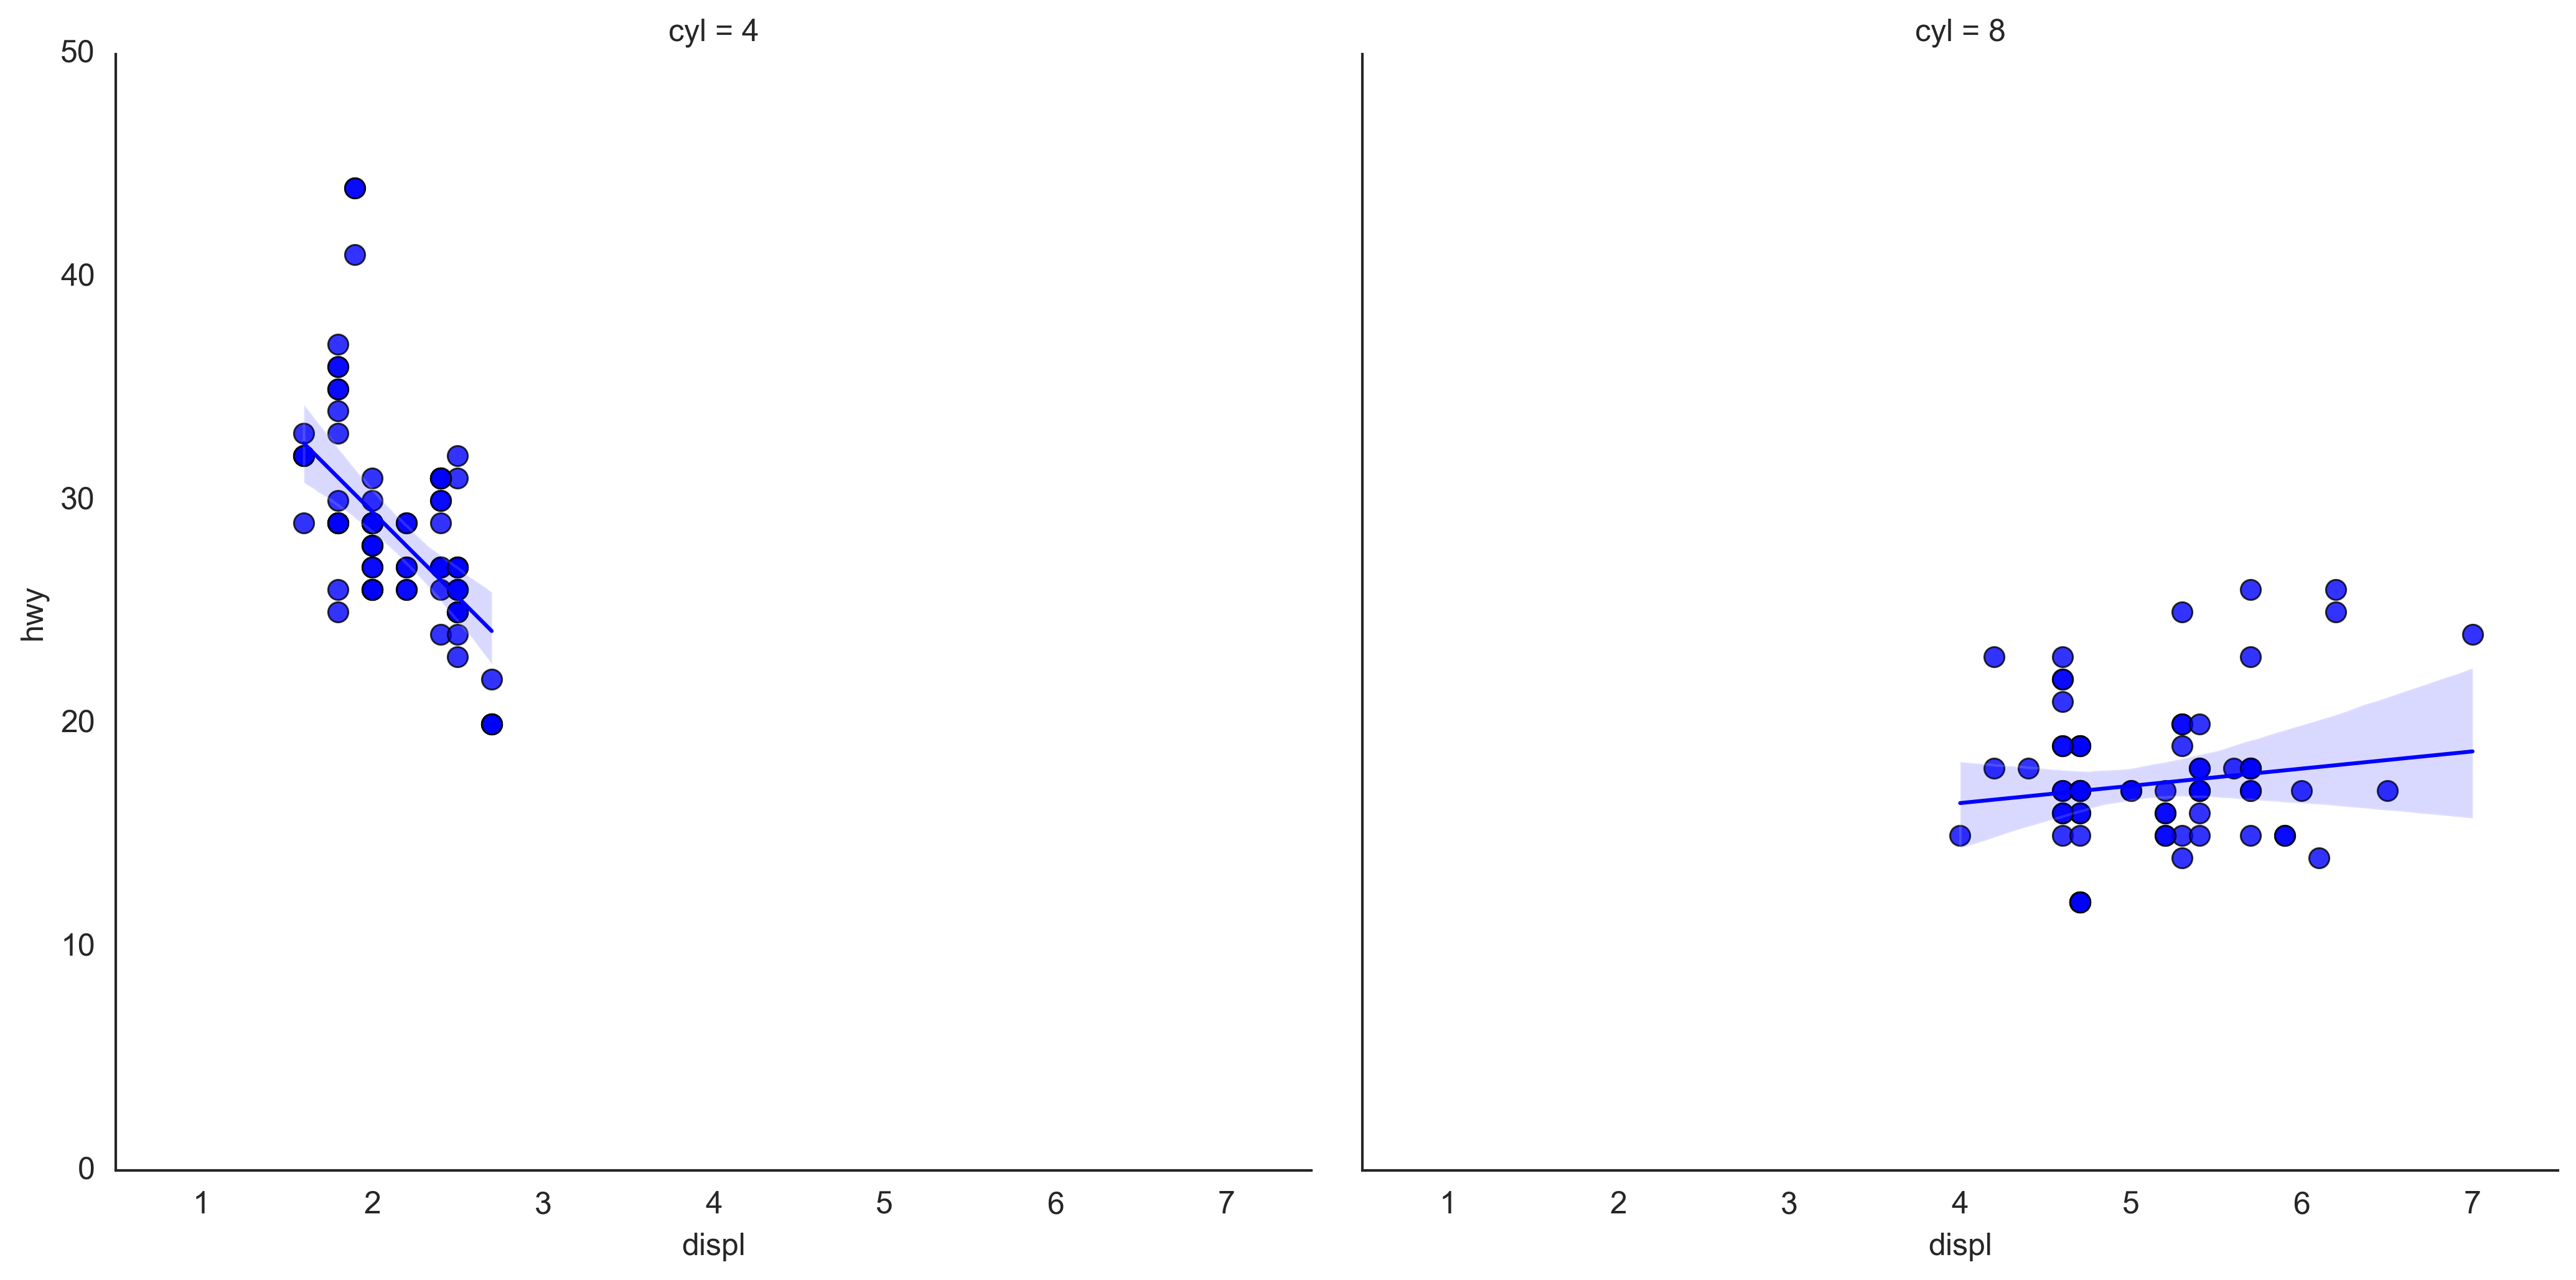

In [11]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
plt.gcf().set_dpi(300)
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()



### 4. Jittering with stripplot
Often multiple datapoints have exactly the same X and Y values. As a result, multiple points get plotted over each other and hide. To avoid this, jitter the points slightly so you can visually see them. This is convenient to do using seaborn’s stripplot()

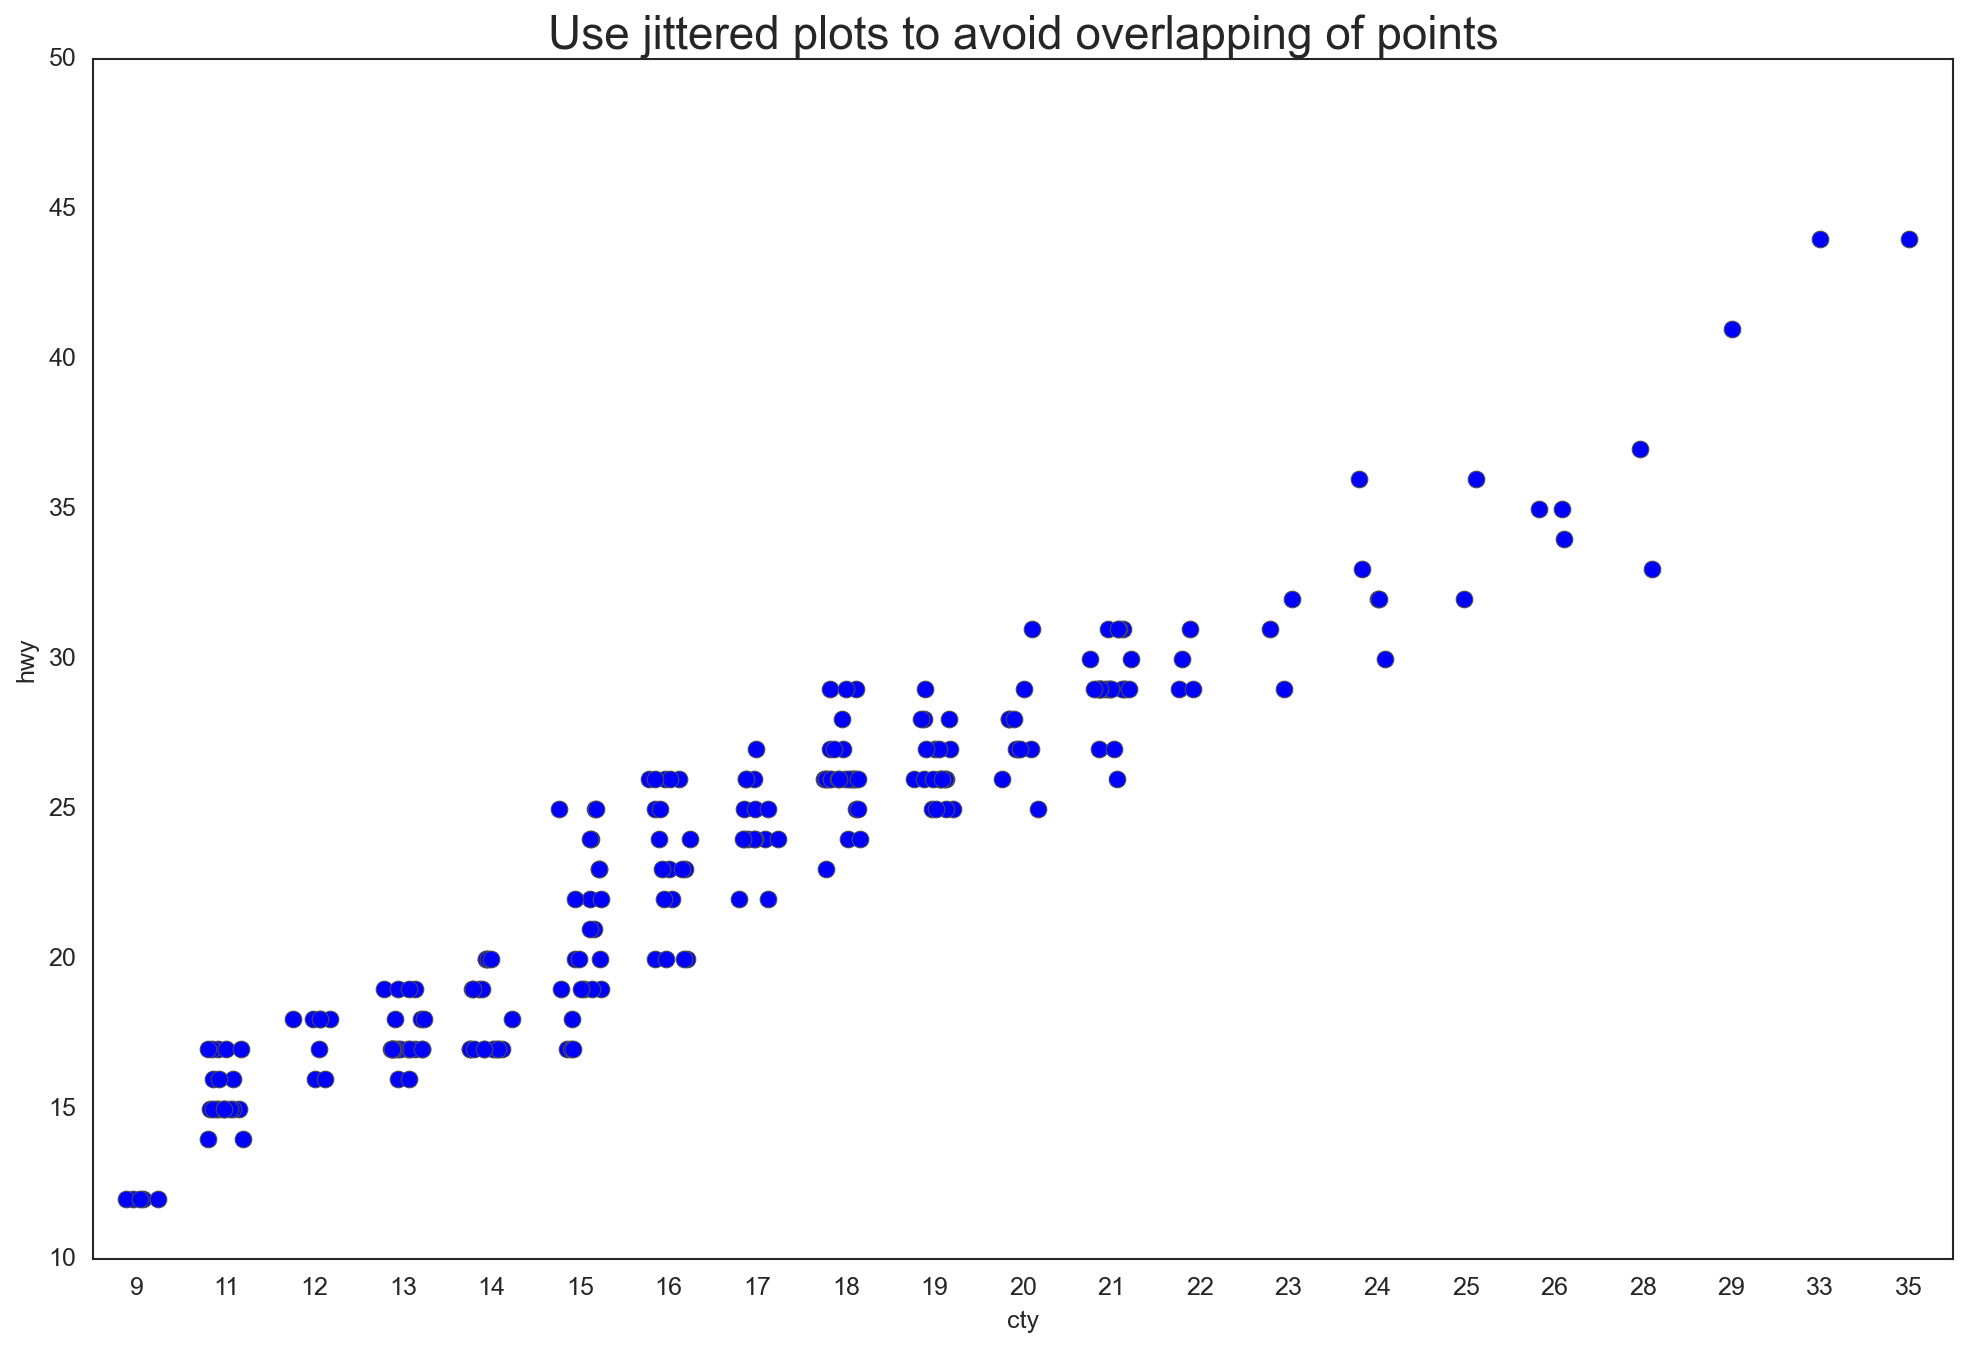

In [12]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 150)    
sns.stripplot(x=df.cty, y=df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()



### 5. Counts Plot
Another option to avoid the problem of points overlap is the increase the size of the dot depending on how many points lie in that spot. So, larger the size of the point more is the concentration of points around that.

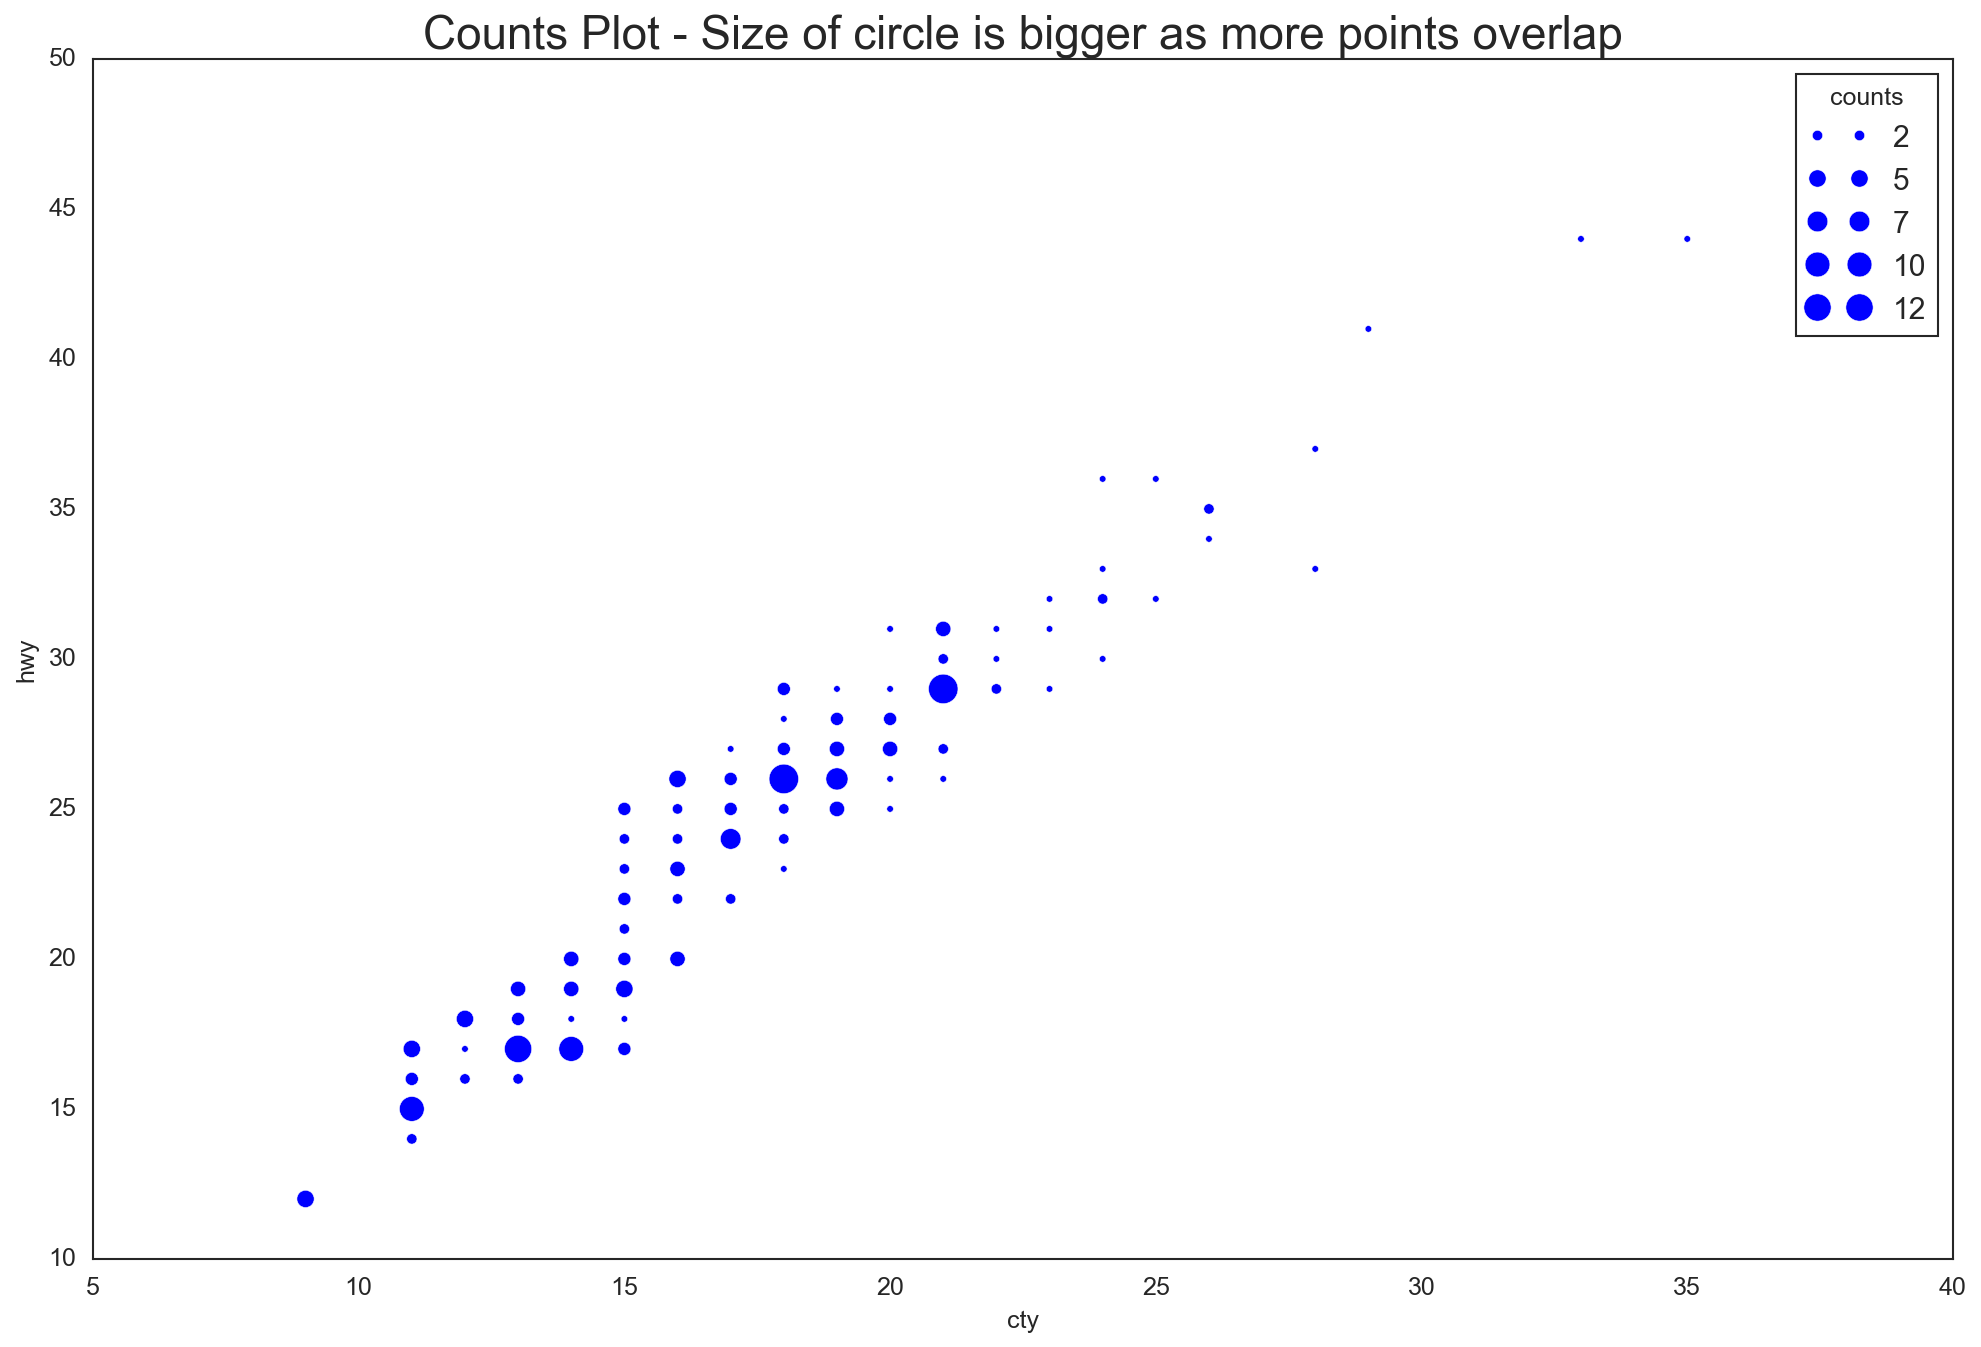

In [13]:
# Import Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Gruppieren und Zählen
df_counts = (
    df.groupby(['hwy', 'cty'])
    .size()
    .reset_index(name='counts')
)

# Scatterplot zeichnen
fig, ax = plt.subplots(figsize=(16, 10), dpi=150)
sns.scatterplot(
    x="cty", 
    y="hwy", 
    size="counts", 
    sizes=(10, 200),  # Min- und Max-Größen für die Punkte
    data=df_counts, 
    ax=ax
)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()


### 6. Marginal Histogram
Marginal histograms have a histogram along the X and Y axis variables. This is used to visualize the relationship between the X and Y along with the univariate distribution of the X and the Y individually. This plot if often used in exploratory data analysis (EDA).

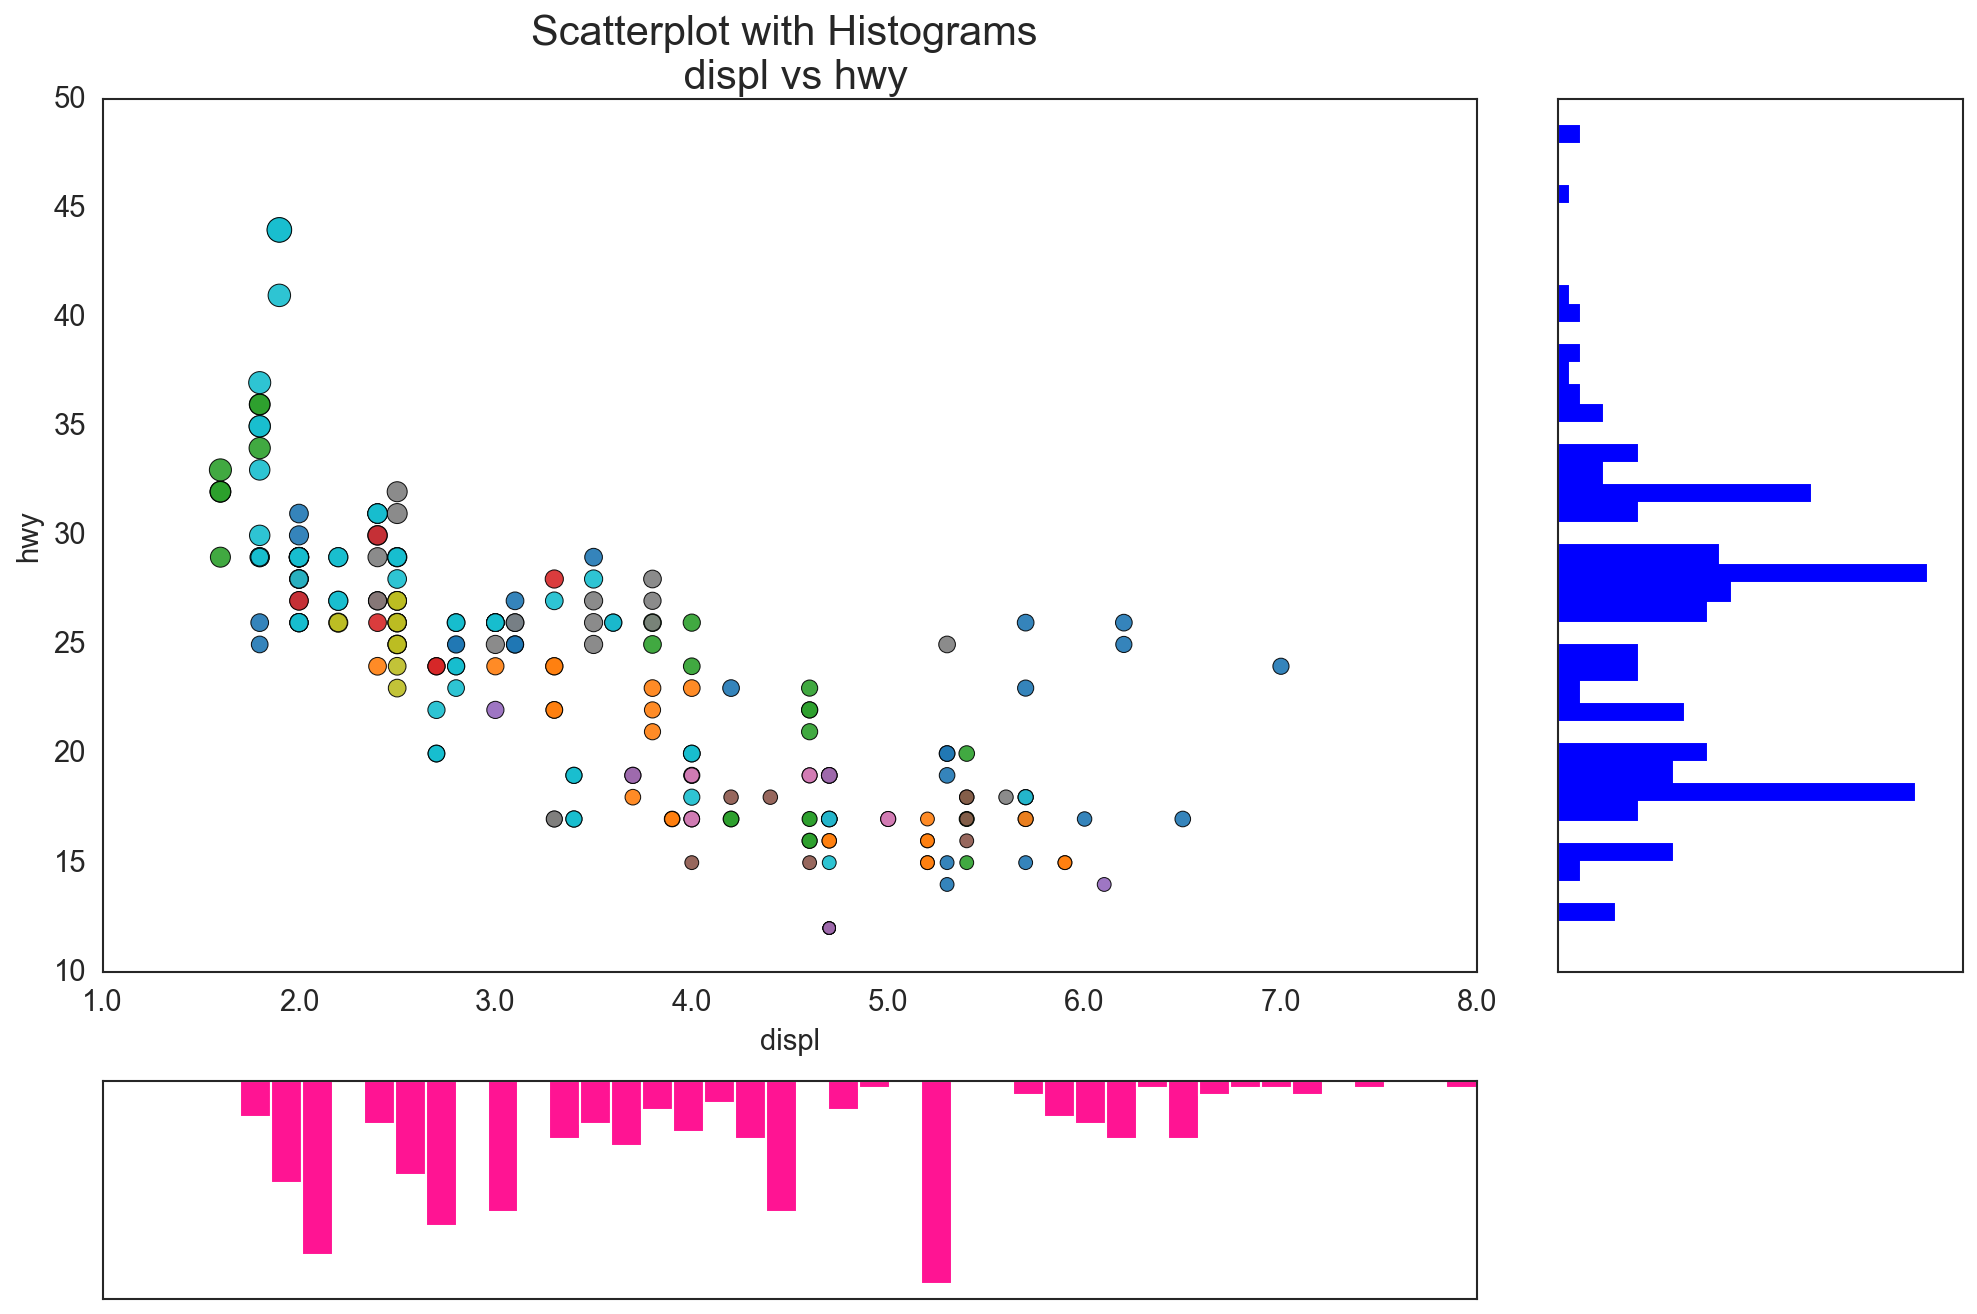

In [14]:


# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 150)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='black', linewidths=.5)

# histogram on the bottom
ax_bottom.hist(df.displ, 40, histtype='bar', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the right
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='blue')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()



### 7. Marginal Boxplot
Marginal boxplot serves a similar purpose as marginal histogram. However, the boxplot helps to pinpoint the median, 25th and 75th percentiles of the X and the Y.

### 8. Correllogram
Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables in a given dataframe (or 2D array).

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'mpg'),
  Text(0, 1.5, 'cyl'),
  Text(0, 2.5, 'disp'),
  Text(0, 3.5, 'hp'),
  Text(0, 4.5, 'drat'),
  Text(0, 5.5, 'wt'),
  Text(0, 6.5, 'qsec'),
  Text(0, 7.5, 'vs'),
  Text(0, 8.5, 'am'),
  Text(0, 9.5, 'gear'),
  Text(0, 10.5, 'carb'),
  Text(0, 11.5, 'fast')])

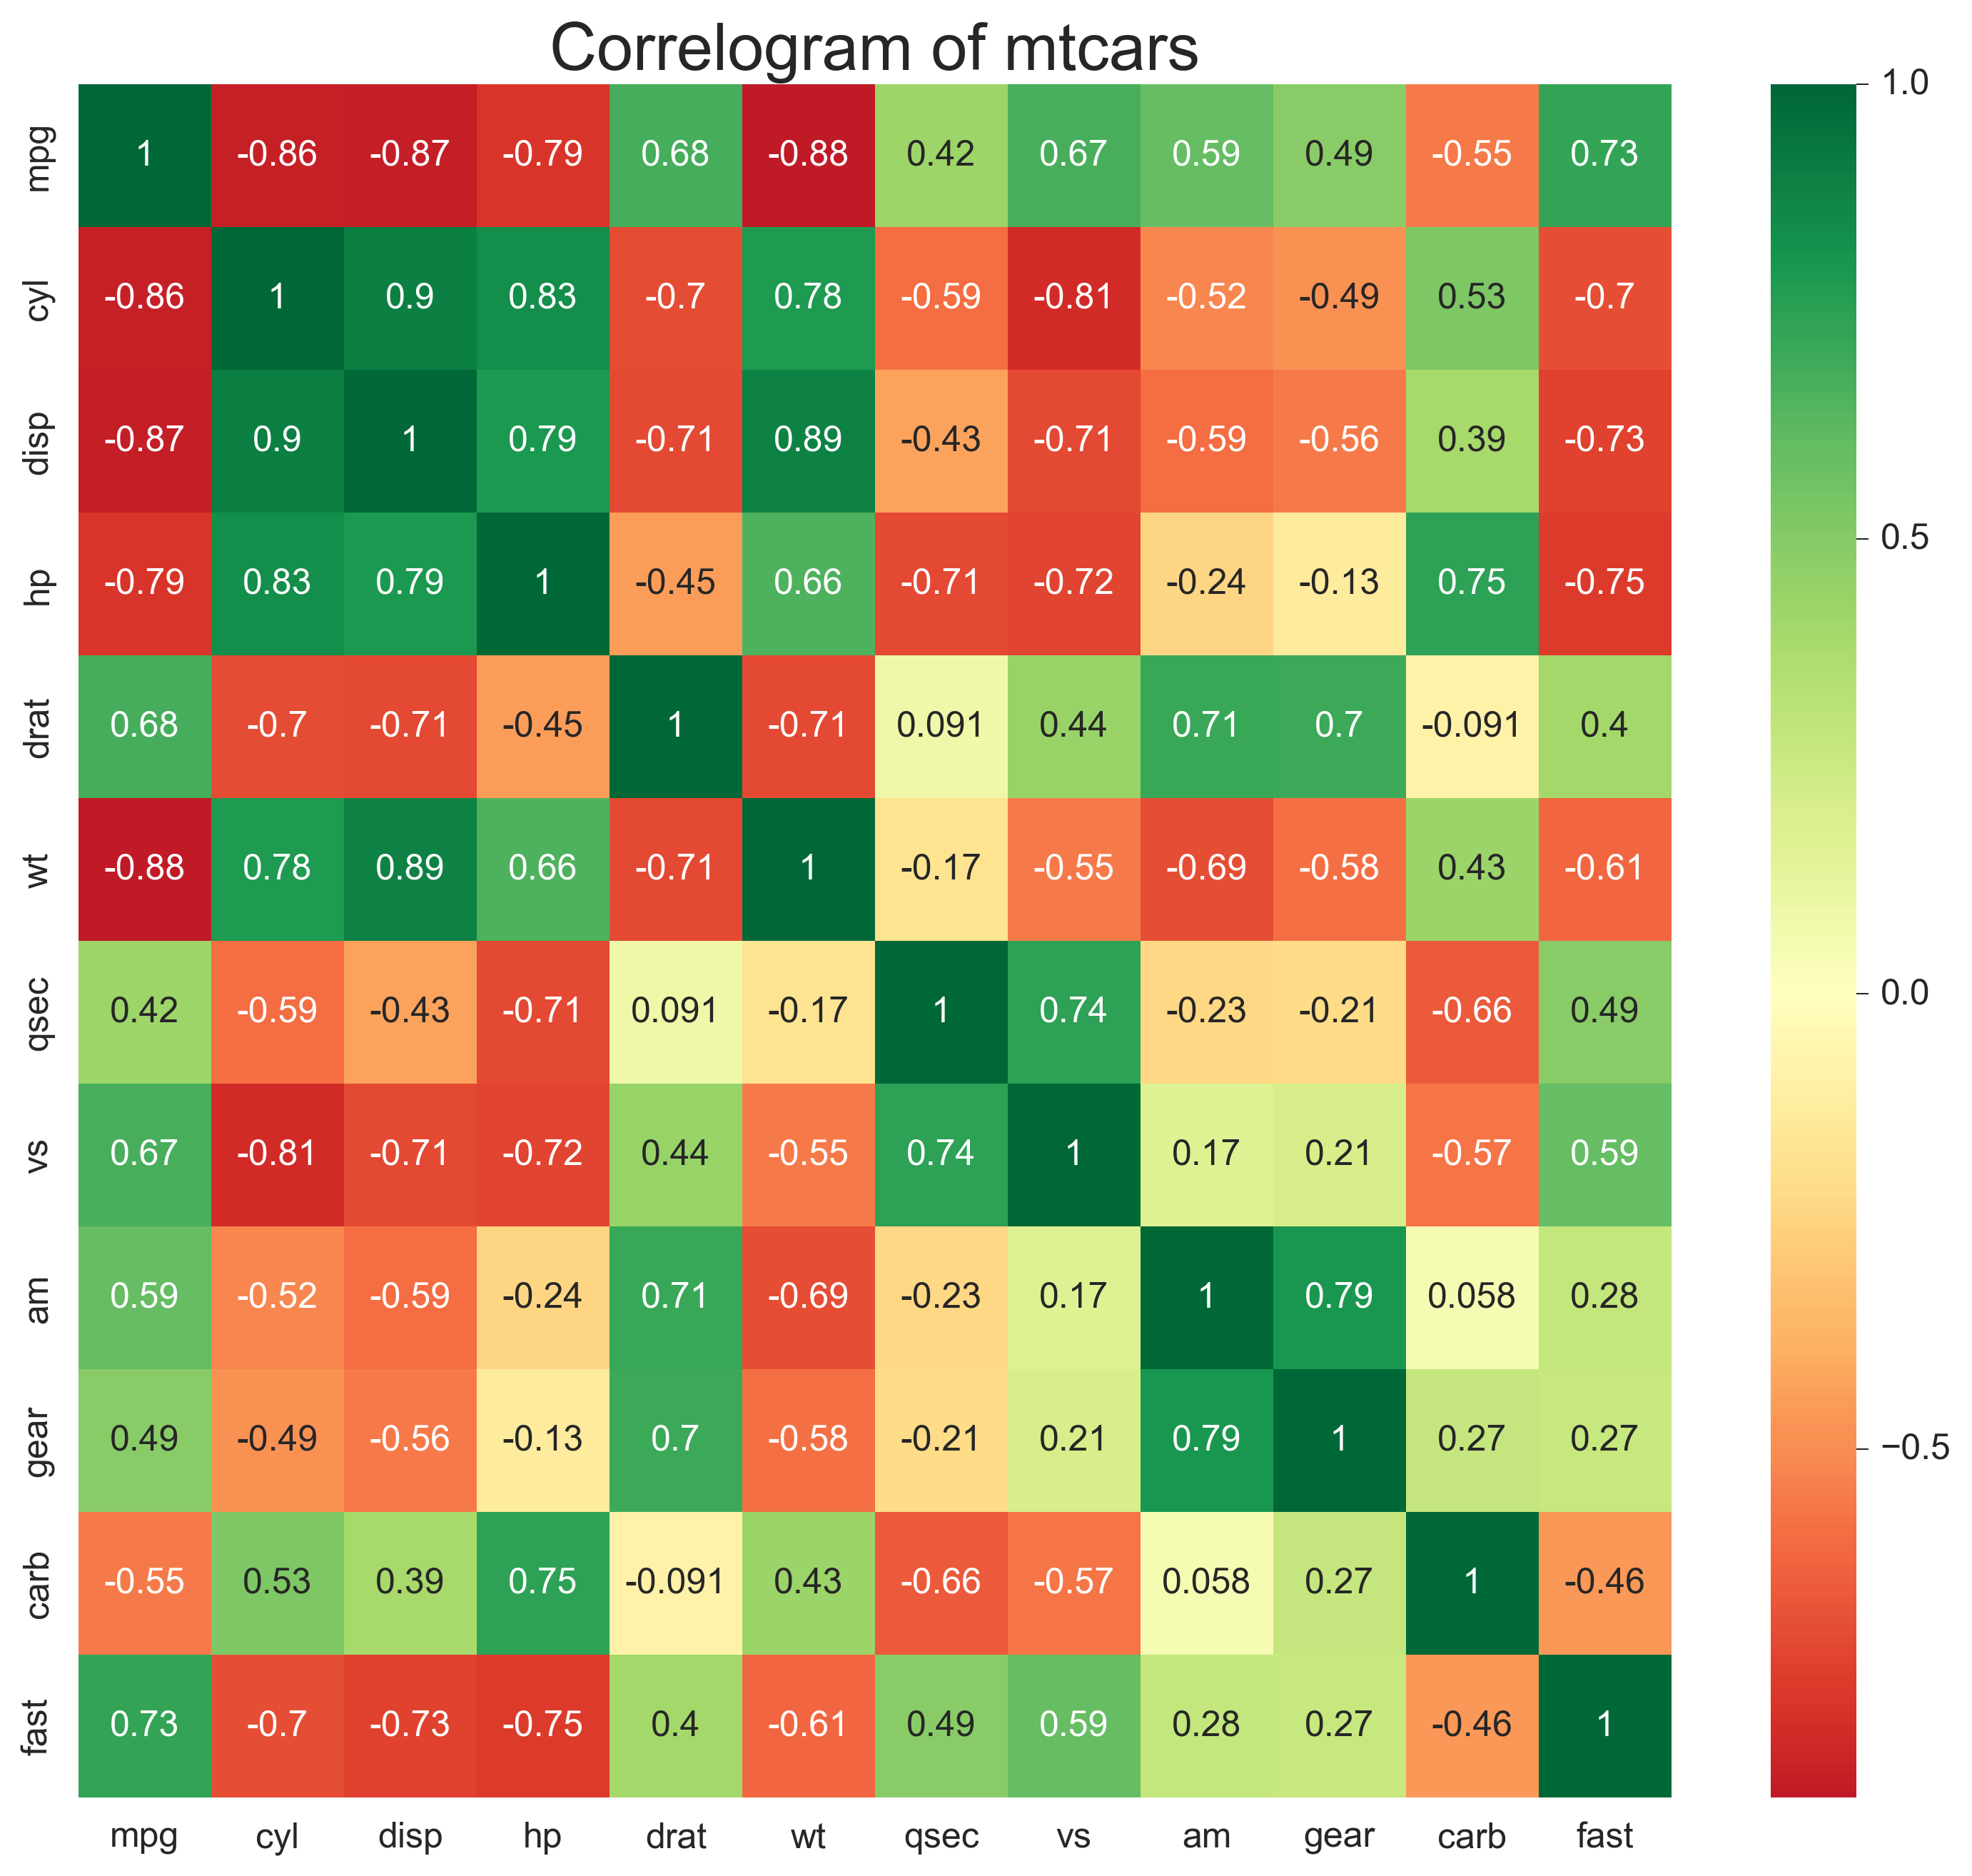

In [15]:
# Import Dataset
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")


df = df.select_dtypes(include=['float64', 'int64'])


# Plot
plt.figure(figsize=(12,10), dpi= 300)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



### 9. Pairwise Plot
Pairwise plot is a favorite in exploratory analysis to understand the relationship between all possible pairs of numeric variables. It is a must have tool for bivariate analysis.

<Figure size 3000x2400 with 0 Axes>

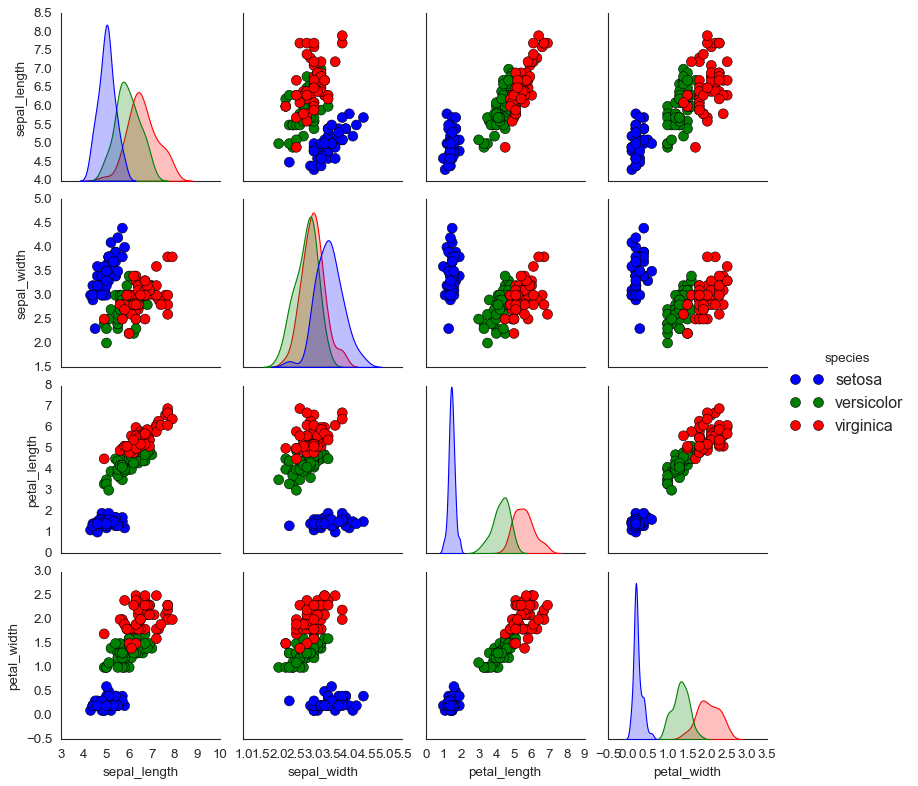

In [18]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 300)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="black", linewidth=.5))
plt.show()



<Figure size 3000x2400 with 0 Axes>

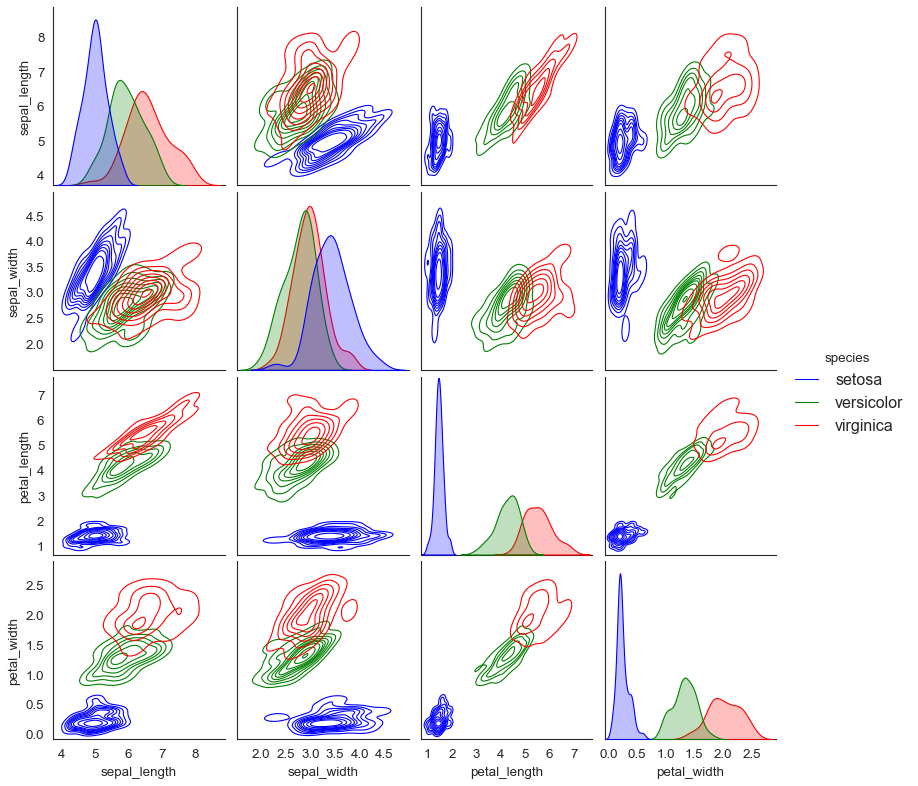

In [20]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 300)
sns.pairplot(df, kind="kde", hue="species")
plt.show()
